In [1]:
import matplotlib.pyplot as plt

from dataloader import load_patient_task_data_from_txt, clean_and_verify

In [2]:
patient_x_task_y_data = load_patient_task_data_from_txt('008-2', 2)
patient_x_task_y_data = clean_and_verify(patient_x_task_y_data)

Dropping acc_x_right_shank (has no useful information)
Dropping acc_y_right_shank (has no useful information)
Dropping acc_z_right_shank (has no useful information)
Dropping gyro_x_right_shank (has no useful information)
Dropping gyro_y_right_shank (has no useful information)
Dropping gyro_z_right_shank (has no useful information)
Dropping acc_x_waist (has no useful information)
Dropping acc_y_waist (has no useful information)
Dropping acc_z_waist (has no useful information)
Dropping gyro_x_waist (has no useful information)
Dropping gyro_y_waist (has no useful information)
Dropping gyro_z_waist (has no useful information)


In [3]:
patient_x_task_y_data.head()

,time,RTA,RGS,IO,ECG,LTA,acc_x_left_shank,acc_y_left_shank,acc_z_left_shank,gyro_x_left_shank,gyro_y_left_shank,gyro_z_left_shank,acc_x_arm,acc_y_arm,acc_z_arm,gyro_x_arm,gyro_y_arm,gyro_z_arm,SC,label
0,12:21:03.002,-118.0,589.5,-87.0,20.0,-455.5,8079.555122,1658.150315,-1703.621582,-74.569948,23.912800,28.989416,1775.409802,6677.647565,4835.072849,-220.513684,-123.664642,41.961101,1382.0,0
1,12:21:03.004,164.5,525.0,-86.5,15.0,-455.5,8080.502625,1668.203862,-1697.174246,-75.869305,24.058756,30.010927,1750.193894,6676.190988,4828.855295,-227.940857,-122.963505,40.733251,1382.0,0
2,12:21:03.006,2.0,448.5,-86.5,6.5,-425.5,8082.072567,1676.782250,-1692.616120,-77.683688,24.248311,30.937731,1722.873084,6674.410628,4824.701318,-237.711188,-123.130047,39.424852,1382.0,0
3,12:21:03.008,0.0,512.0,-86.0,16.0,-353.0,8083.495006,1683.507093,-1688.905329,-79.798714,24.291911,31.643023,1697.968183,6671.086845,4822.964893,-251.254347,-125.397726,38.144301,1382.0,0
4,12:21:03.010,252.5,618.0,-85.5,4.0,-277.5,8084.000000,1688.000000,-1685.000000,-82.000000,24.000000,32.000000,1680.000000,6665.000000,4824.000000,-270.000000,-131.000000,37.000000,1382.0,0


In [4]:
num_fog_labels = len(patient_x_task_y_data[patient_x_task_y_data.label == 1])
print(f'{num_fog_labels} of {len(patient_x_task_y_data)} ({num_fog_labels / len(patient_x_task_y_data) * 100:.2f}%) of timestamps have fog')

92000 of 187500 (49.07%) of timestamps have fog


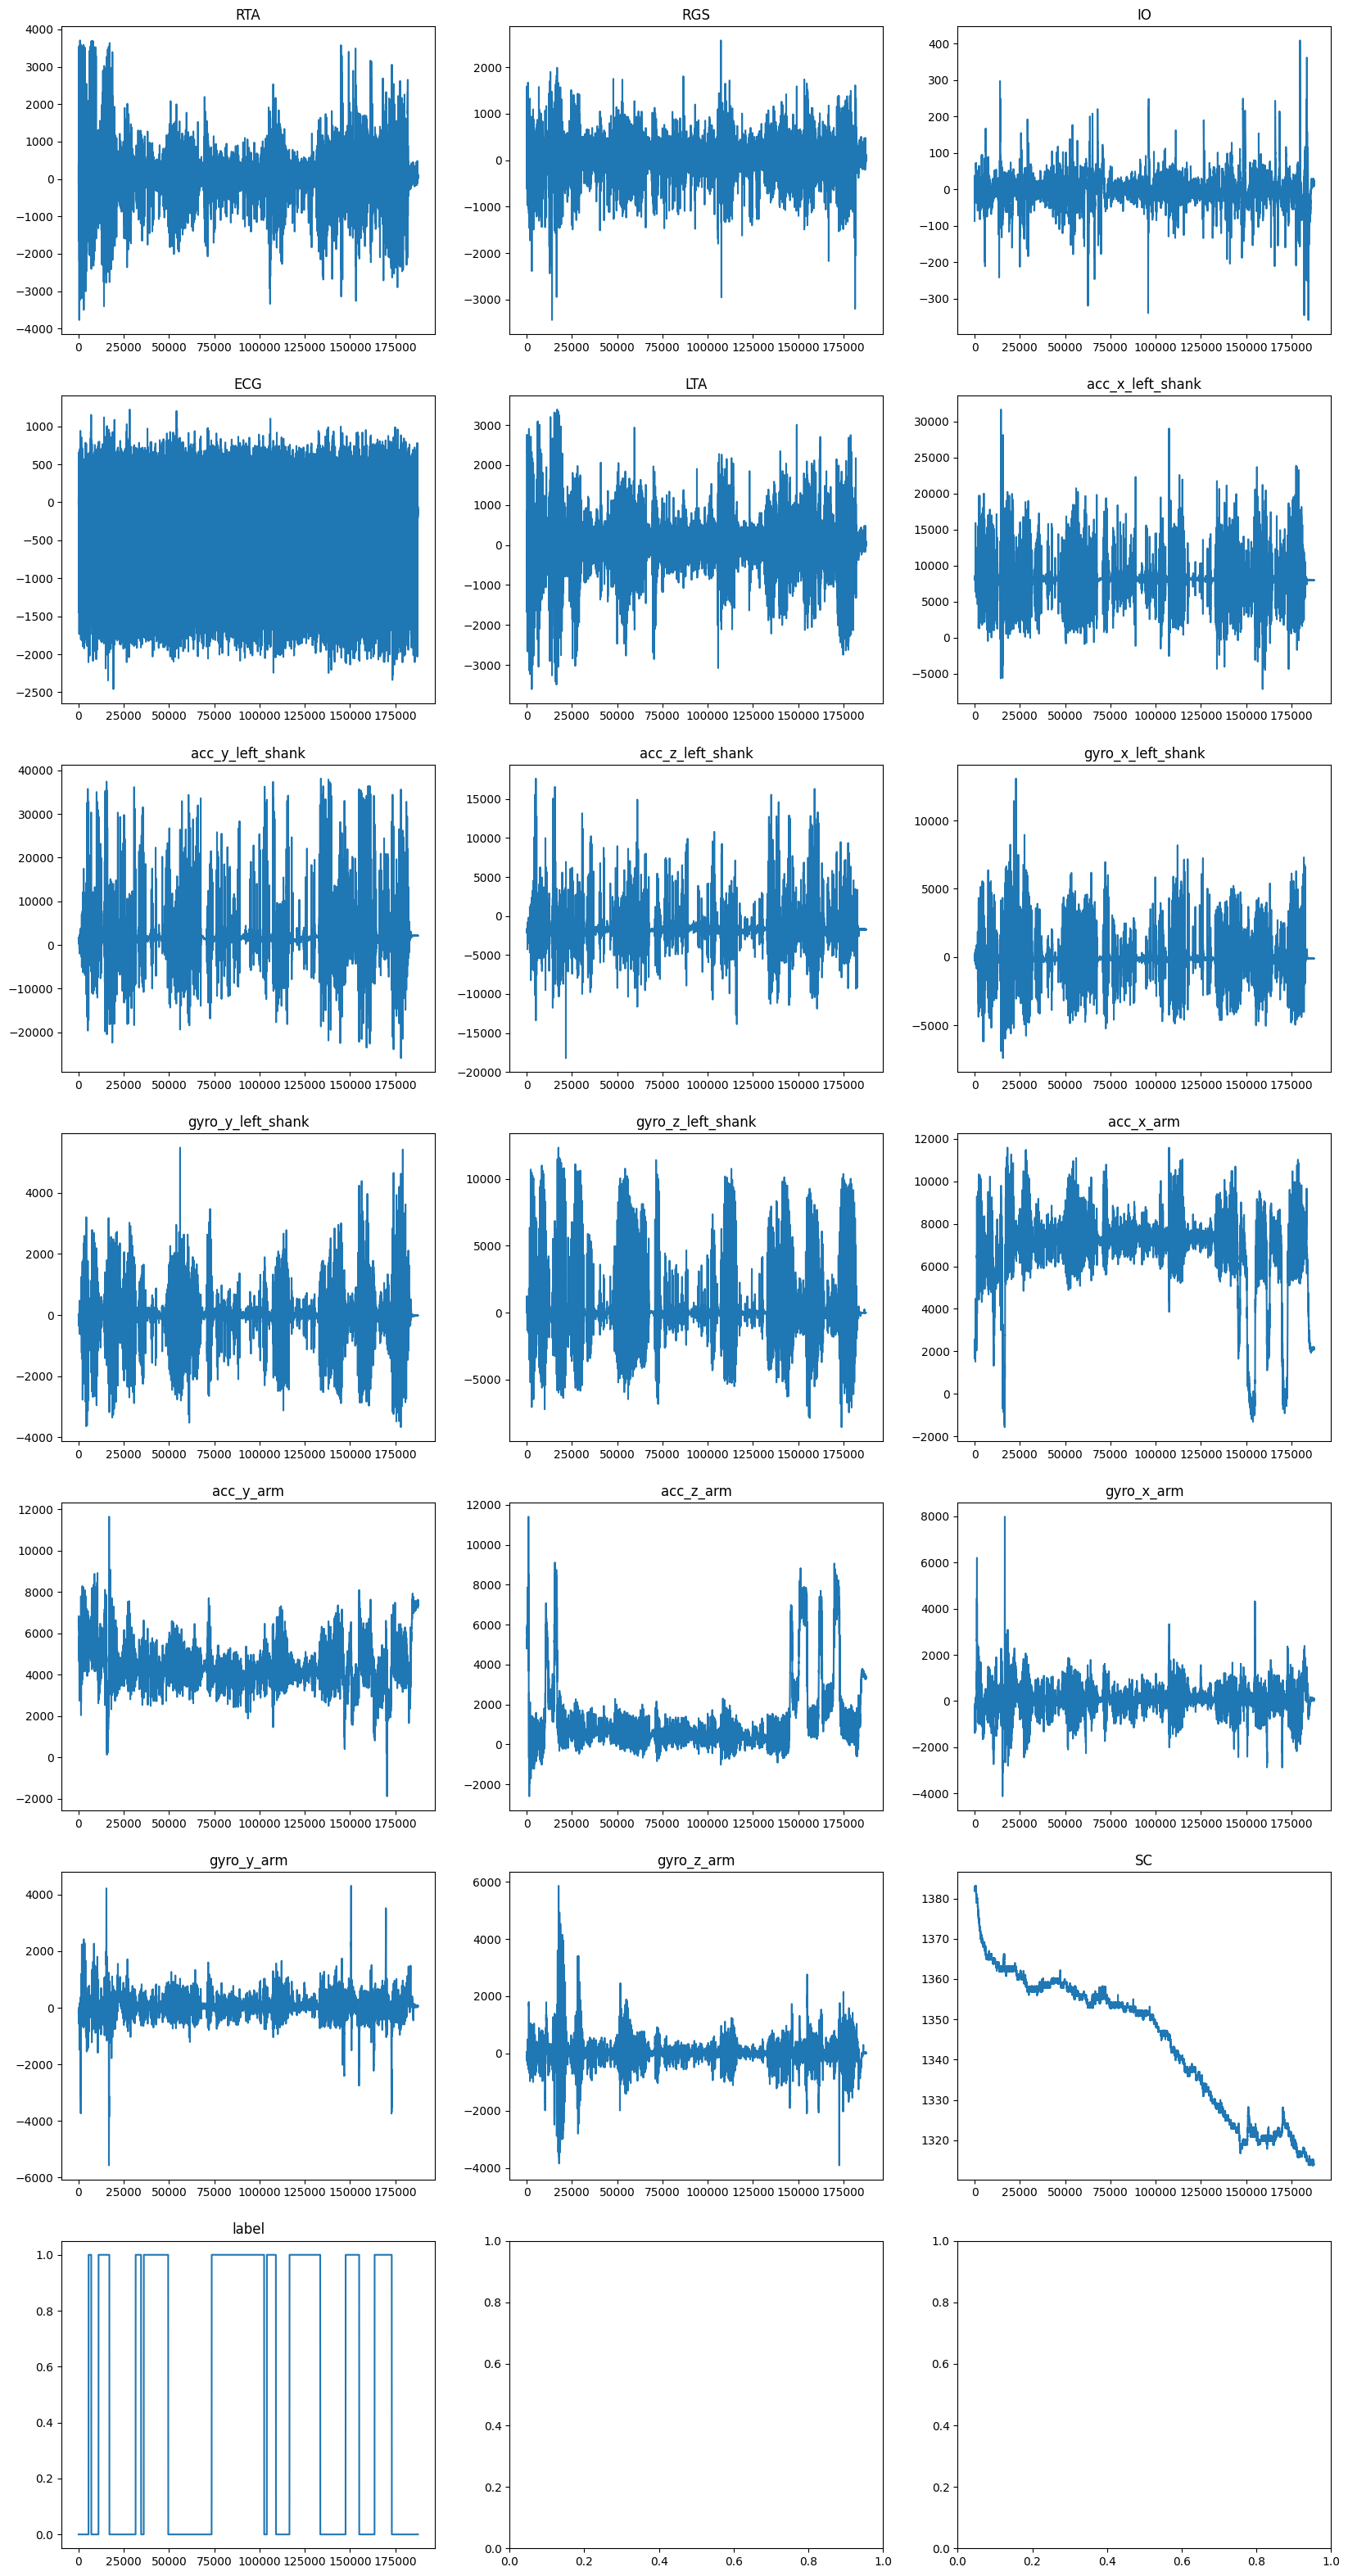

In [9]:
nrows = len(patient_x_task_y_data.columns) // 3 + 1
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 40))

col_idx = 1
for r in range(nrows):
    for c in range(ncols):
        if col_idx == len(patient_x_task_y_data.columns):
            break
            
        patient_x_task_y_data[patient_x_task_y_data.columns[col_idx]].plot(
            ax=axs[r, c],
            title=patient_x_task_y_data.columns[col_idx]
        )
        
        col_idx += 1